In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Median Value of Owner-occupied homes Boxplot

Text(0.5, 0, 'Median Value of Owner-occupied homes in $1000')

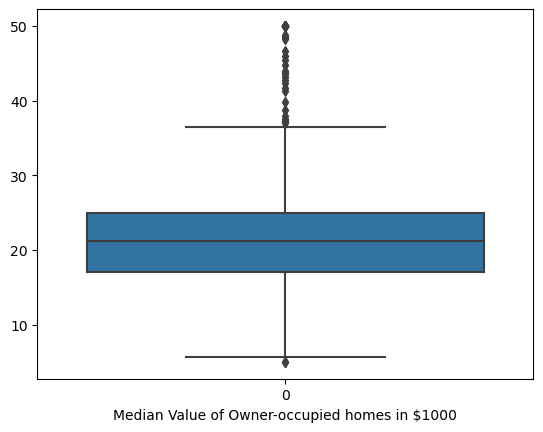

In [4]:
ax = sns.boxplot(data = boston_df['MEDV'])
ax.set_xlabel('Median Value of Owner-occupied homes in $1000')

### Charles River Barplot

<AxesSubplot:xlabel='CHAS', ylabel='count'>

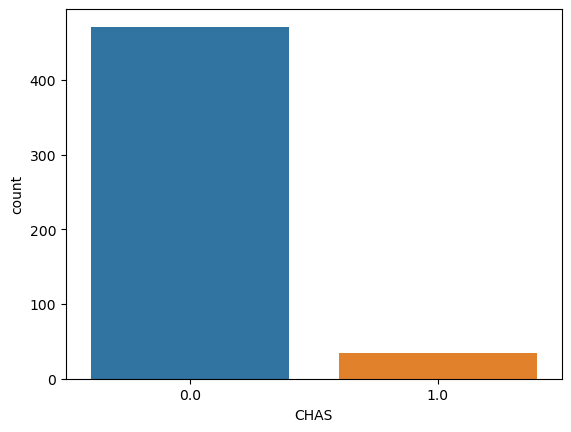

In [5]:
sns.countplot(x = boston_df['CHAS'])

### Boxplot MEDV vs AGE binned (<35, 35-60, >70)

In [6]:
boston_df.loc[(boston_df['AGE'] < 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70), 'AGE_GRP'] = '35-70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GRP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70 years old
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70 years old
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70 years old
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70 years old


Text(0, 0.5, 'Median Value of Owner-occupied home in $1000')

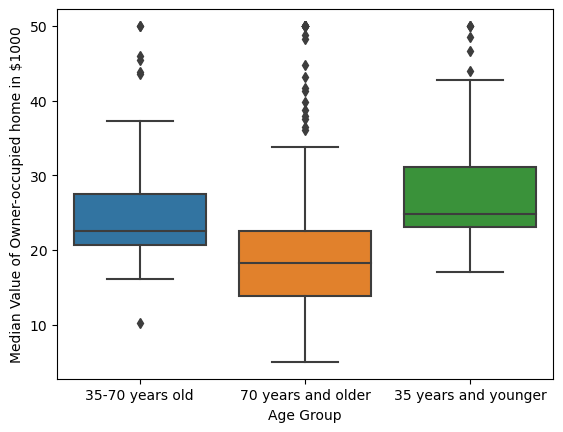

In [8]:
ax = sns.boxplot(data = boston_df, x = 'AGE_GRP', y = 'MEDV')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Value of Owner-occupied home in $1000')

### Nitric Oxide and Proportion of Non-retail business acres per town

Text(0, 0.5, 'Proportion of Non-retail Business Acres per Town')

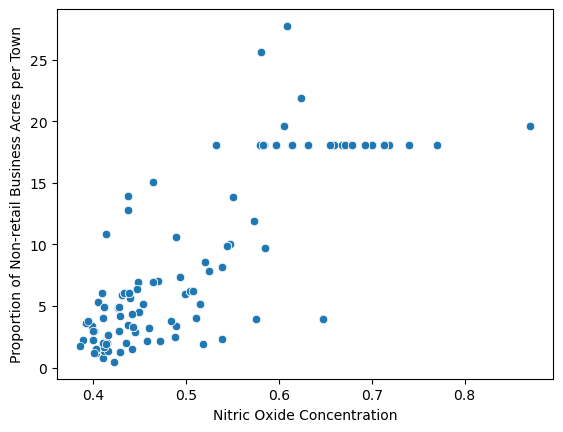

In [9]:
ax = sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')
ax.set_xlabel('Nitric Oxide Concentration')
ax.set_ylabel('Proportion of Non-retail Business Acres per Town')

### Pupil to Teacher Ratio Histogram

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

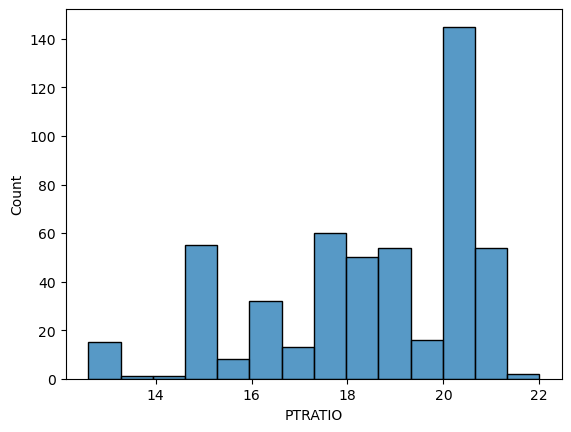

In [10]:
sns.histplot(data = boston_df['PTRATIO'])

### Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [11]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

the p-value is less than 0.05, so we reject the null hypothesis. Thus it is evident that there's a significant difference in median value of houses bounded by the Charles river

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [13]:
thirtyfive_and_younger = boston_df[boston_df['AGE_GRP'] == '35 years and younger']['MEDV']
thirtyfive_to_seventy = boston_df[boston_df['AGE_GRP'] == '35-70 years old']['MEDV']
seventy_and_older = boston_df[boston_df['AGE_GRP'] == '70 years and older']['MEDV']

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_and_younger, thirtyfive_to_seventy, seventy_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


the p-value is less than 0.05, so we reject the null hypothesis. Thus it is evident that there's a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

the p-value is less than 0.05, so we reject the null hypothesis. Thus there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [16]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        21:11:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the p-value is less than 0.05, so we reject the null hypothesis. Thus there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes